<a href="https://colab.research.google.com/github/ayushku634/INVESTX/blob/main/LSTMTrain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [244]:
import numpy as np
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
#from datetime import datetime

In [245]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [246]:
df = pd.read_csv('/content/drive/MyDrive/Train.csv')
print(df.head())
df=df.head(150)

         Date    Stock  liabilities      equity  total_assets  current_assets  \
0  2006-07-31  Stock 1   625.898686  925.086518   1550.985204      675.789905   
1  2006-08-31  Stock 1   407.387467  903.249093   1310.636561     1023.110983   
2  2006-09-29  Stock 1   464.069891  602.668832   1066.738722      709.711673   
3  2006-10-31  Stock 1   855.854937  391.375369   1247.230306      649.979564   
4  2006-11-30  Stock 1   453.954969  956.490566   1410.445534     1115.594551   

   current_liabilities  total_revenue  net_income   dividend  \
0           555.931329     548.488451  251.282553  68.184030   
1          1295.186240     513.446432  207.576940  42.232672   
2           598.719338     503.519871  133.719700  28.835722   
3           733.594339     596.006397  -76.881818   0.000000   
4          1152.274711     965.939247 -309.204301   0.000000   

   shares_outstanding       price  
0             1040831  100.000000  
1             1046649  101.924169  
2             109415

In [247]:
cols = list(df)[2:12]
print(cols)

['liabilities', 'equity', 'total_assets', 'current_assets', 'current_liabilities', 'total_revenue', 'net_income', 'dividend', 'shares_outstanding', 'price']


In [248]:
df_for_training = df[cols].astype(float)

In [249]:
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [250]:
trainX = []
trainY = []

In [251]:
n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 14 # Number of past days we want to use to predict the future.

In [252]:
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 9])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (136, 14, 10).
trainY shape == (136, 1).


In [253]:
df_for_training_scaled

array([[ 0.25220378,  1.41884066,  1.28105593, ...,  1.83696687,
        -0.33248576, -2.39597646],
       [-0.59414981,  1.34029146,  0.61107448, ...,  0.87868441,
        -0.12707445, -2.14167174],
       [-0.37460332,  0.25910443, -0.0688005 , ...,  0.38398725,
         1.55028652, -1.97752193],
       ...,
       [-1.25021177,  0.92718225, -0.18122825, ..., -0.68080352,
         1.33922622,  0.45098837],
       [ 0.95077629,  0.38434975,  0.98211698, ..., -0.68080352,
        -0.14949387,  0.29755242],
       [ 0.68338604,  0.6752647 ,  1.01512818, ..., -0.68080352,
         0.83872591,  0.20597296]])

In [254]:
trainY

array([[-1.29336659],
       [-1.47769308],
       [-1.39607302],
       [-1.48510424],
       [-1.52622491],
       [-1.43369363],
       [-1.29010226],
       [-1.37039056],
       [-1.54880656],
       [-1.76081581],
       [-1.69680299],
       [-1.63237441],
       [-1.5422965 ],
       [-1.4960694 ],
       [-1.44809413],
       [-1.39580814],
       [-1.17350716],
       [-1.13197986],
       [-0.95825406],
       [-0.76492415],
       [-0.47399161],
       [-0.45596223],
       [-0.51737493],
       [-0.63911435],
       [-0.78122505],
       [-0.74318884],
       [-0.71427426],
       [-0.60842931],
       [-0.56264839],
       [-0.59513763],
       [-0.48704487],
       [-0.55989148],
       [-0.50403421],
       [-0.31532371],
       [-0.24776968],
       [-0.24399868],
       [-0.17562413],
       [-0.0511738 ],
       [-0.27321327],
       [-0.29749954],
       [-0.1927685 ],
       [-0.100504  ],
       [-0.03464017],
       [ 0.07409369],
       [ 0.0031423 ],
       [-0

In [255]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True)) 
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 14, 64)            19200     
                                                                 
 lstm_15 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 31,649
Trainable params: 31,649
Non-trainable params: 0
_________________________________________________________________


In [256]:
history = model.fit(trainX, trainY, epochs=5, batch_size=3, validation_split=0.1, verbose=1)

Epoch 1/5
41/41 [==============================] - 4s 26ms/step - loss: 0.3258 - val_loss: 0.0579
Epoch 2/5
41/41 [==============================] - 1s 17ms/step - loss: 0.0795 - val_loss: 0.0510
Epoch 3/5
41/41 [==============================] - 1s 17ms/step - loss: 0.0535 - val_loss: 0.0381
Epoch 4/5
41/41 [==============================] - 1s 16ms/step - loss: 0.0433 - val_loss: 0.0334
Epoch 5/5
41/41 [==============================] - 1s 17ms/step - loss: 0.0461 - val_loss: 0.0313


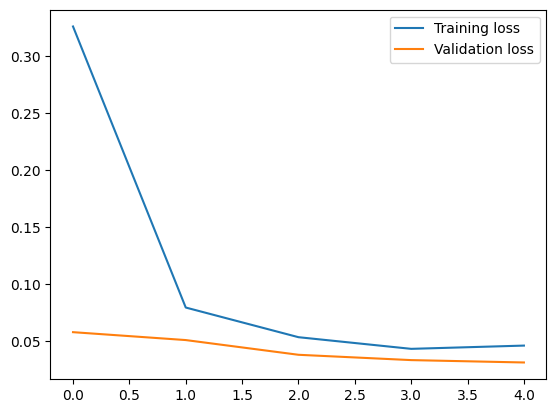

In [257]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [258]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())

In [259]:
df2= df.head(150)
train_dates = pd.to_datetime(df2['Date'])
print(train_dates.tail(15)) 

135   2017-10-31
136   2017-11-30
137   2017-12-29
138   2018-01-31
139   2018-02-28
140   2018-03-30
141   2018-04-30
142   2018-05-31
143   2018-06-29
144   2018-07-31
145   2018-08-31
146   2018-09-28
147   2018-10-31
148   2018-11-30
149   2018-12-31
Name: Date, dtype: datetime64[ns]


In [260]:
n_past = 150
n_days_for_prediction=136  #let us predict past 15 days

predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq='M').tolist()
print(predict_period_dates)

[Timestamp('2006-07-31 00:00:00', freq='M'), Timestamp('2006-08-31 00:00:00', freq='M'), Timestamp('2006-09-30 00:00:00', freq='M'), Timestamp('2006-10-31 00:00:00', freq='M'), Timestamp('2006-11-30 00:00:00', freq='M'), Timestamp('2006-12-31 00:00:00', freq='M'), Timestamp('2007-01-31 00:00:00', freq='M'), Timestamp('2007-02-28 00:00:00', freq='M'), Timestamp('2007-03-31 00:00:00', freq='M'), Timestamp('2007-04-30 00:00:00', freq='M'), Timestamp('2007-05-31 00:00:00', freq='M'), Timestamp('2007-06-30 00:00:00', freq='M'), Timestamp('2007-07-31 00:00:00', freq='M'), Timestamp('2007-08-31 00:00:00', freq='M'), Timestamp('2007-09-30 00:00:00', freq='M'), Timestamp('2007-10-31 00:00:00', freq='M'), Timestamp('2007-11-30 00:00:00', freq='M'), Timestamp('2007-12-31 00:00:00', freq='M'), Timestamp('2008-01-31 00:00:00', freq='M'), Timestamp('2008-02-29 00:00:00', freq='M'), Timestamp('2008-03-31 00:00:00', freq='M'), Timestamp('2008-04-30 00:00:00', freq='M'), Timestamp('2008-05-31 00:00:00'

In [261]:
prediction = model.predict(trainX[-n_days_for_prediction:])

5/5 [==============================] - 1s 8ms/step


In [262]:
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,9]

In [263]:
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'price':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])

In [264]:
original = df[['Date', 'price']]
original['Date']=pd.to_datetime(original['Date'])
original


<ipython-input-264-20f60c629b61>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Date']=pd.to_datetime(original['Date'])


,Date,price
0,2006-07-31,100.000000
1,2006-08-31,101.924169
2,2006-09-29,103.166191
3,2006-10-31,104.478956
4,2006-11-30,104.160907
...,...,...
145,2018-08-31,120.895608
146,2018-09-28,120.817216
147,2018-10-31,121.541253
148,2018-11-30,120.380297


In [265]:
df_forecast

,Date,price
0,2006-07-31,108.646667
1,2006-08-31,108.358185
2,2006-09-30,108.391487
3,2006-10-31,107.726662
4,2006-11-30,107.649391
...,...,...
131,2017-06-30,122.356796
132,2017-07-31,122.455536
133,2017-08-31,122.788918
134,2017-09-30,122.658752


<Axes: xlabel='Date'>

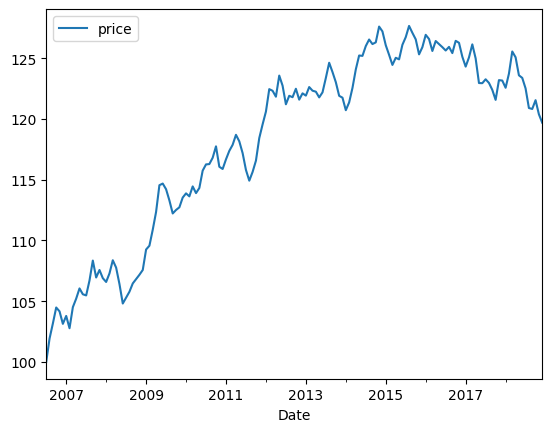

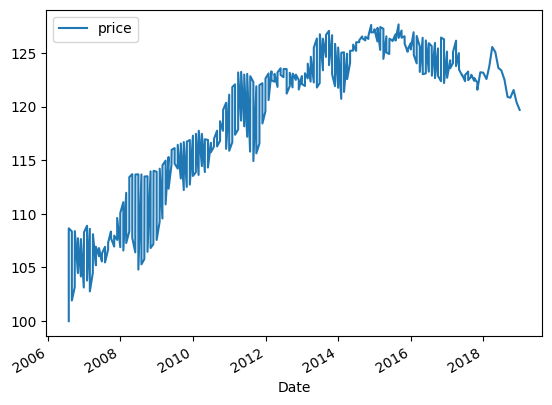

In [266]:
original.plot(x='Date',y='price')
original= pd.concat([original,df_forecast],axis=0)
original.plot(x='Date',y='price')
#f_forecast.plot(x='Date',y='price')


In [267]:
def RMS(actual,predicted):
    rms = math.sqrt((((actual-predicted)/actual)**2).mean())
    return rms

In [268]:
error = (RMS(original['price'],df_forecast['price']))*100


In [269]:
Efficiency = 100 - error
print("Efficiency = ",Efficiency,"%")

Efficiency =  97.744536106436 %
